In [278]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from multi_otsu_thresholding import *

In [279]:
cv2.__version__

'3.4.0'

Load the initial greyscale image and show it

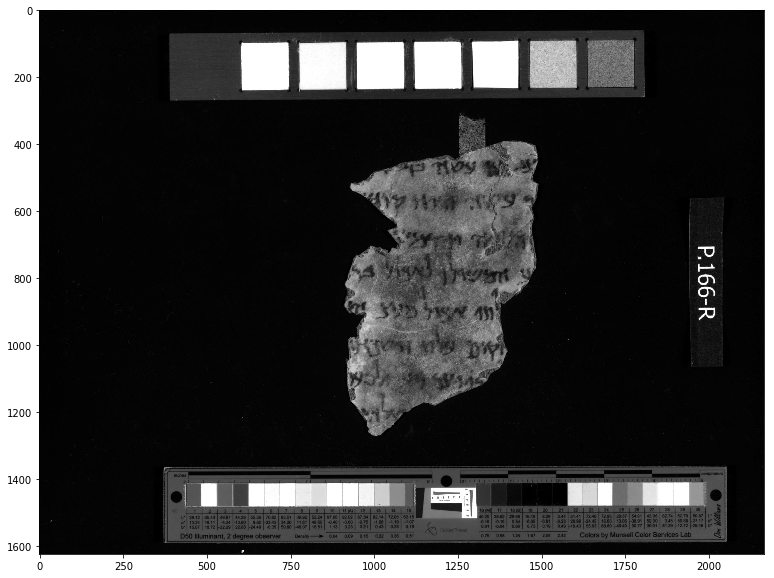

In [296]:
image = cv2.imread('image-data/test6.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

Threshold the image for binarization

In [281]:
#otsu_image = multi_otsu_thresholding(image)
#thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#thresh_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 0)
#thresh_image = 255 - image
thresh_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 10)
thresh_image = 255 - thresh_image

thresh_image = cv2.Canny(image,0,255)
thresh_image = cv2.GaussianBlur(thresh_image,(5,5),0)

Show the thresholded image


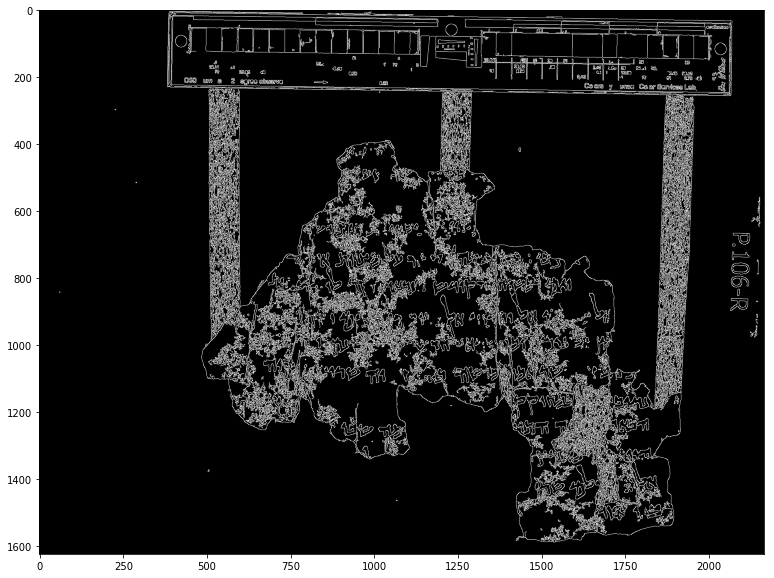

In [282]:
plt.figure(figsize = (500,10))
plt.imshow(thresh_image, cmap='gray')
plt.show()

Find the connected components of the binary image

In [283]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_image, 8, cv2.CV_32S)
area = stats[:,4]
print(stats)
n_labels


[[      0       0    2165    1624 2692753]
 [    381       1    1691    1590  777236]
 [    405      73      39      40     677]
 [   1190      87      84      33    1504]
 [   2016      96      40      40     686]
 [   1266     101       8      12      94]
 [    654     109       7       8      54]
 [    934     135      15      15     212]
 [   1069     137      11      14     132]
 [   2009     140      44      72    1764]
 [   1287     143      12       9      97]
 [   1790     147      18      15     252]
 [    506     149      35      43     859]
 [   1926     149      19      15     272]
 [    826     152      28      16     371]
 [   1026     154      12      16     149]
 [   1054     155      18      16     251]
 [   1124     156      12      16     165]
 [    569     164      17      14     199]
 [   1826     165      22      17     297]
 [    874     167      33      18     462]
 [   1781     166      35      15     446]
 [   1108     171       8      14     104]
 [   1344  

92

Filter out the components with a small area

In [284]:
filtered_components = []
threshold = 8000
for i in range(len(area)):
    if(area[i] > threshold):
        filtered_components.append(i)
filtered_components

[0, 1]

Find the component that contains the parchment

In [285]:
height, width = thresh_image.shape
area_threshold = 0.5 * height * width
print(area_threshold)
biggest_area = 0
best_component = 0

for component in filtered_components:
    if(area[component] < area_threshold and area[component] > biggest_area):
        biggest_area = area[component]
        best_component = component
        

best_component

1757980.0


1

Set selected component to white, everything else to black

In [286]:
for i in range(height):
    for j in range(width):
        if(labels[i][j] == best_component):
            thresh_image[i][j] = 255
        else:
            thresh_image[i][j] = 0
      

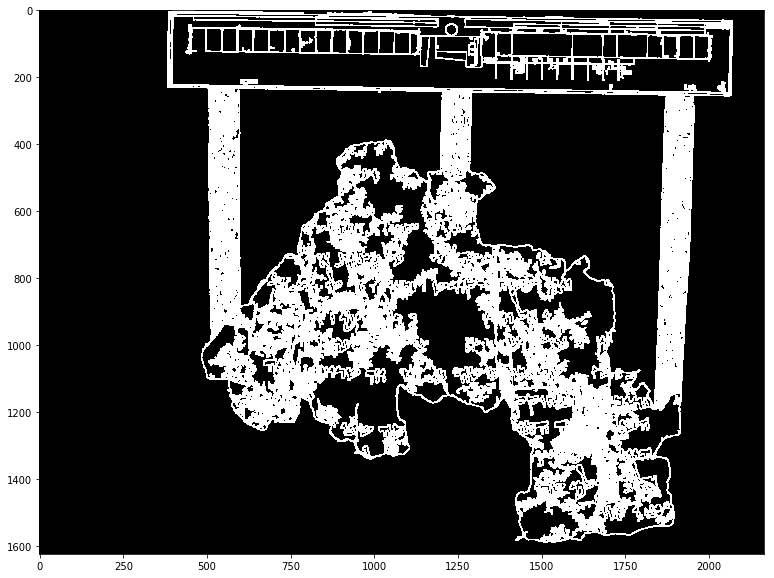

In [287]:
plt.figure(figsize = (500,10))
plt.imshow(thresh_image, cmap='gray')
plt.show()

In [288]:
# contour = cv2.findContours

# contour = cv2.contourArea(thresh_image)

Extract the parchment from the image

In [289]:
parchment_stats = stats[best_component,:]
parchment_stats

array([   381,      1,   1691,   1590, 777236], dtype=int32)

In [290]:
x = parchment_stats[0]

In [291]:
y = parchment_stats[1]

In [292]:
width = parchment_stats[2]

In [293]:
height = parchment_stats[3]

In [294]:
parchment = image[y:y+height, x:x+width]

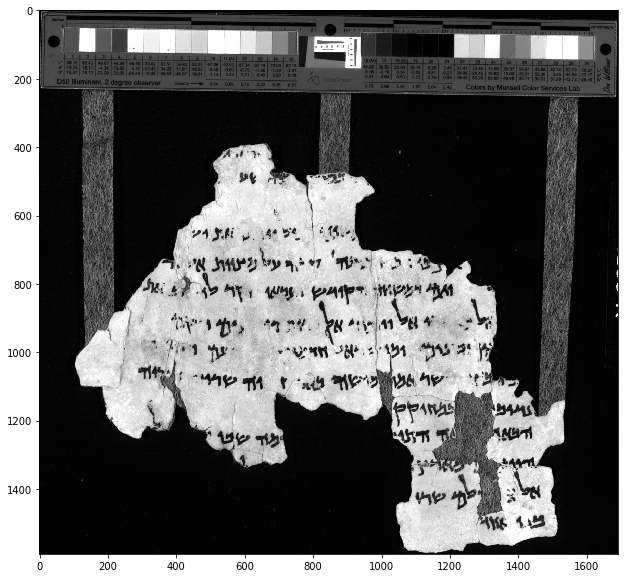

In [295]:
plt.figure(figsize = (500,10))
plt.imshow(parchment, cmap='gray')
plt.show()

# 